# Kaggle Titantic

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [2]:
os.getcwd()

'/Users/erik/Desktop/Python/Kaggle/Titantic'

載入資料

In [3]:
train=pd.read_csv('train.csv',encoding='utf-8')
test=pd.read_csv('test.csv',encoding='utf-8')
submit=pd.read_csv('gender_submission.csv',encoding='utf-8')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


合併資料

In [5]:
data=train.append(test)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [6]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


注意Age、Cabin、Embarked、Fare均有遺漏值

In [8]:
data['Survived'].value_counts(normalize=True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

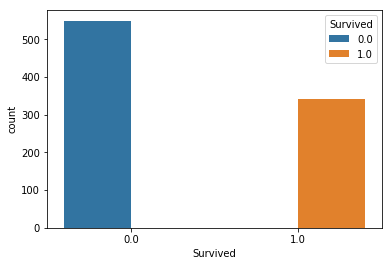

In [9]:
sns.countplot(data['Survived'],hue=data['Survived'])

死亡人數多餘生存人數

In [10]:
data.groupby('Sex').mean().round(3)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,28.687,46.198,0.633,648.187,2.155,0.652,0.742
male,30.585,26.155,0.248,658.766,2.372,0.414,0.189


男生票價平均比較便宜，比較少父母小孩一起來，生存率較低

In [11]:
data.groupby('Pclass').mean().round(3)

,Age,Fare,Parch,PassengerId,SibSp,Survived
Pclass,,,,,,
1,39.160,87.509,0.365,672.492,0.437,0.630
2,29.507,21.179,0.368,671.567,0.394,0.473
3,24.816,13.303,0.401,640.559,0.568,0.242


明顯地發現，艙等1(票價特高，推測頭等艙)生存率較高，年紀也偏高

本資料集並不大，雖然Sex是類別應該要使用one hot，但是從資料上發現女性生存機率比較高，也避免多增一個維度。因此將女性設定為1，男性為0。

In [12]:
data['Sex_Code']=data['Sex'].map({'female':1,'male':0}).astype('int')

In [13]:
#分割資料集
df_train=data[:len(train)]
df_test=data[len(train):]

In [14]:
#不使用CV，直接把training data來當作驗證
X=df_train.loc[:,['Sex_Code','Pclass']]
Y=df_train.loc[:,'Survived']

In [15]:
from sklearn.ensemble import RandomForestClassifier
Base_model=RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_model.fit(X,Y)
print('score=%.5f'%Base_model.oob_score_)

score=0.73176


使用Sex和Pclass就有73%
未來若低於這個就不用繼續做了！

In [16]:
data.groupby(['Sex','Pclass'])['Survived'].aggregate('mean').unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [17]:
#另一種寫法
data.pivot_table(values='Survived',index='Sex',columns='Pclass',aggfunc='mean',margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [18]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

S港很多，遺漏值也只有2個，那就直接補S港

In [19]:
data['Embarked']=data['Embarked'].fillna('S')

Pandas透視圖

In [20]:
data.pivot_table(values='Survived',index='Embarked',columns='Pclass',aggfunc='mean',margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,0.694118,0.529412,0.378788,0.553571
Q,0.500000,0.666667,0.375000,0.389610
S,0.589147,0.463415,0.189802,0.339009
All,0.629630,0.472826,0.242363,0.383838


若在3號艙等，登S港生存機率低於其他兩個港口

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


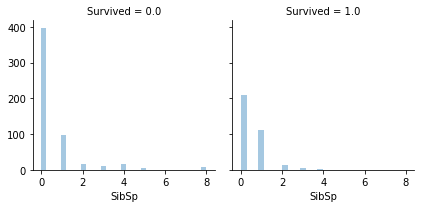

In [21]:
#兄弟姊妹＋丈夫妻子數量
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'SibSp',kde=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


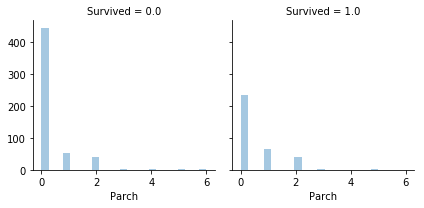

In [22]:
#父母＋小孩
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Parch',kde=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


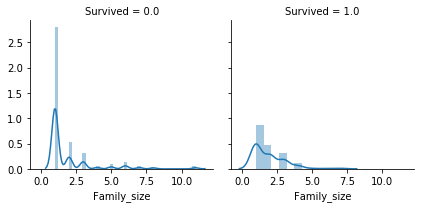

In [23]:
#組合成一個新欄位
data['Family_size']=data['Parch']+data['SibSp']+1
#要自己也算進去，因此後面多加一
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Family_size',kde=True)

In [24]:
data['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [25]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

應該可以看看買同一張Ticket的人有沒有關係

In [26]:
deplicate_ticket = []
for tk in data['Ticket'].unique():
    tem = data.loc[data['Ticket'] == tk, 'Fare']
    if tem.count() >1:
         deplicate_ticket.append(data.loc[data['Ticket'] == tk,['Name','Ticket','Fare','Cabin','Family_size','Survived']])
deplicate_ticket = pd.concat(deplicate_ticket)
deplicate_ticket.head(100)

,Name,Ticket,Fare,Cabin,Family_size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
234,"Cumings, Mr. John Bradley",PC 17599,71.2833,C85,2,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
146,"Hilliard, Mr. Herbert Henry",17463,51.8625,E46,1,NaN
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


In [27]:
friend=deplicate_ticket.loc[(deplicate_ticket.Family_size==1)]
len(friend)

127

In [28]:
family=deplicate_ticket.loc[(deplicate_ticket.Family_size>1)]
len(family)

469

朋友組別有127個人，家人組別有469人

先將有相同票根的人分成一個群組，若全數生還(不考慮測試集)則連結=1，若全數喪命(不考慮測試集)則連結=0，若都不是(不考慮測試集)則判定連結=0.5，命名為Connected_Survival

In [29]:
#***********************************Connect_Survival*************************************#
# the same ticket family or friends
data['Connected_Survival'] = 0.5 # default 
for ticket, df_grp in data.groupby('Ticket'):
    #print(ticket)     
    #print(df_grp)
    if (len(df_grp) > 1):
        for ind, row in df_grp.iterrows():
            smax = df_grp.drop(ind)['Survived'].max()
            smin = df_grp.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data.loc[data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif (smin==0.0):
                data.loc[data['PassengerId'] == passID, 'Connected_Survival'] = 0
#print
print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print("people have connected information : %.0f" 
      %(data[data['Connected_Survival']!=0.5].shape[0]))
%time data.groupby('Connected_Survival')[['Survived']].mean().round(3)

people keep the same ticket: 596 
people have connected information : 496
CPU times: user 4.61 ms, sys: 516 µs, total: 5.13 ms
Wall time: 4.89 ms


,Survived
Connected_Survival,
0.0,0.225
0.5,0.298
1.0,0.728


In [30]:
data['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [31]:
data['T1']=data['Name'].str.split('.',expand=True)[0]
#expand=True是讓資料在dataframe展開欄位
#1是選第二項的titile
data['T1'].head(10)

0         Braund, Mr
1       Cumings, Mrs
2    Heikkinen, Miss
3      Futrelle, Mrs
4          Allen, Mr
5          Moran, Mr
6       McCarthy, Mr
7    Palsson, Master
8       Johnson, Mrs
9        Nasser, Mrs
Name: T1, dtype: object

In [32]:
data['T2']=data['T1'].str.split(',',expand=True)[1]
data['T2']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
5           Mr
6           Mr
7       Master
8          Mrs
9          Mrs
10        Miss
11        Miss
12          Mr
13          Mr
14        Miss
15         Mrs
16      Master
17          Mr
18         Mrs
19         Mrs
20          Mr
21          Mr
22        Miss
23          Mr
24        Miss
25         Mrs
26          Mr
27          Mr
28        Miss
29          Mr
        ...   
388         Mr
389     Master
390         Mr
391        Mrs
392     Master
393         Mr
394         Mr
395        Mrs
396         Mr
397        Mrs
398         Mr
399         Mr
400       Miss
401         Mr
402       Miss
403         Mr
404         Mr
405         Mr
406         Mr
407         Mr
408       Miss
409       Miss
410       Miss
411        Mrs
412       Miss
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: T2, Length: 1309, dtype: object

In [33]:
data['T2'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [34]:
data.pivot_table(values='Survived',index='T2')

,Survived
T2,
Capt,0.000000
Col,0.500000
Don,0.000000
Dona,NaN
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


有些Title好像很尊貴，但不見得生存率較高，感覺幫助並不大，不採用此欄位。

In [35]:
#將剛剛創造的欄位刪除
data=data.drop(['T1','T2'],axis=1)

In [36]:
data.groupby('Survived')['Fare'].mean().round(3)

Survived
0.0    22.118
1.0    48.395
Name: Fare, dtype: float64

有存活者平均票價比死亡者高一倍

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


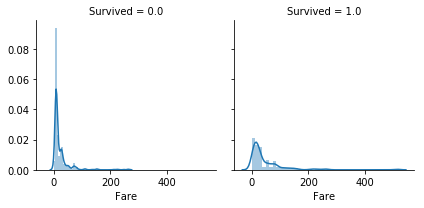

In [37]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Fare',kde=True)

In [38]:
#補缺失值
data['Fare']=data['Fare'].fillna(data['Fare'].median())

Fare        
Survived    0.0     1.0
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

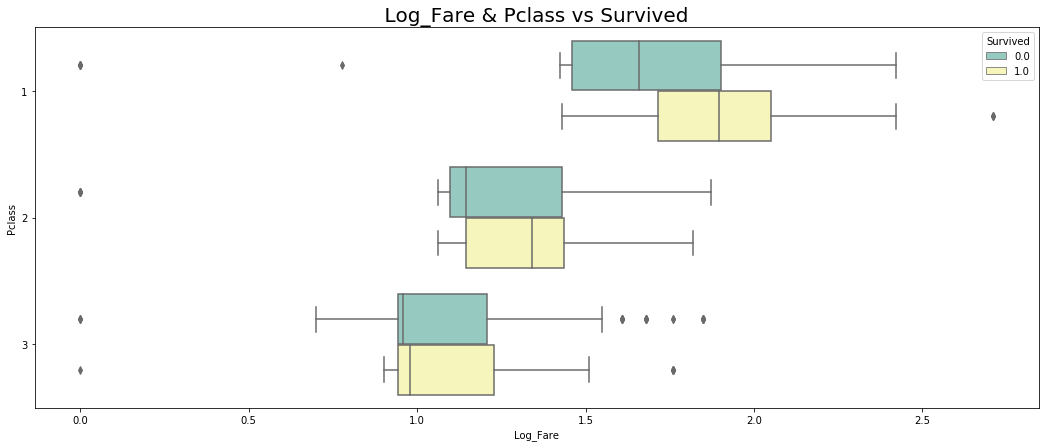

In [39]:
#因票價是連續型變數，若把它切成離散型變數，說不定會有比較好的成效。
# there is some bugs in log-scale of boxplot. 
# alternatively, we transform x into log10(x) for visualization.
fig, ax = plt.subplots( figsize = (18,7) )
data['Log_Fare'] = (data['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=data, orient='h'
                ,ax=ax,palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(data,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median' ).round(3)

In [40]:
# Making Bins
data['FareBin_5'] = pd.qcut(data['Fare'], 5)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['FareBin_Code_5'] = label.fit_transform(data['FareBin_5'])

Sex,female,male,All
Has_Age,,,
0,78,185,263
1,388,658,1046
All,466,843,1309


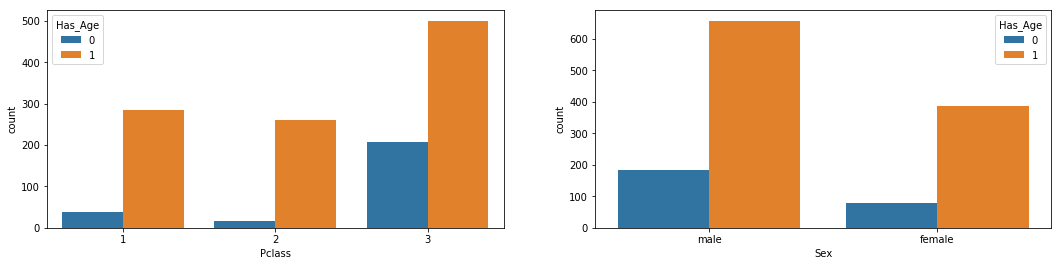

In [41]:
data['Has_Age'] = data['Age'].isnull().map(lambda x : 0 if x == True else 1)
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_figwidth(18)
ax1 = sns.countplot(data['Pclass'],hue=data['Has_Age'],ax=ax1)
ax2 = sns.countplot(data['Sex'],hue=data['Has_Age'],ax=ax2)
pd.crosstab(data['Has_Age'],data['Sex'],margins=True).round(3)

年齡遺漏值較多在Pclass==3的時候

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Age vs Survived in Pclass = 1 and  2')

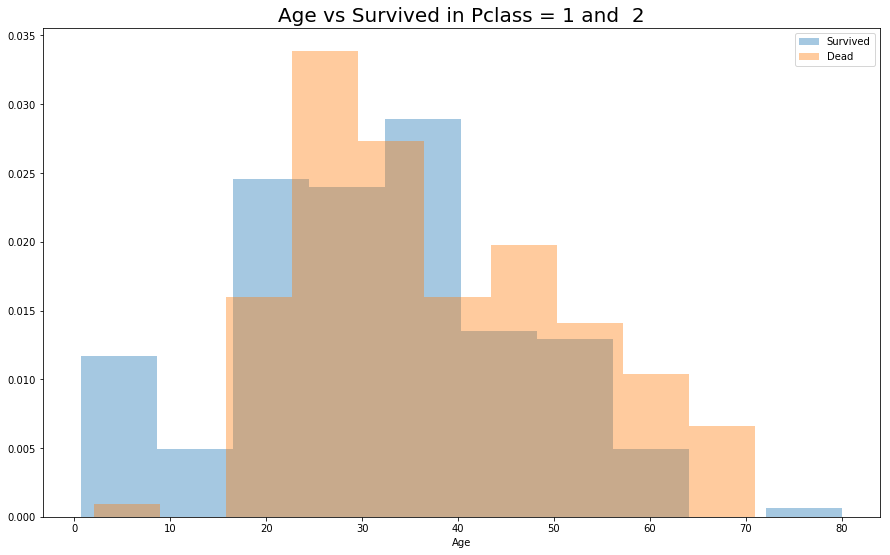

In [42]:
# Masks
Mask_Has_Age_P12_Survived = ( (data.Has_Age == 1) & (data.Pclass != 3 ) & (data.Survived == 1) )
Mask_Has_Age_P12_Dead = ( (data.Has_Age == 1) & (data.Pclass != 3 ) & (data.Survived == 0) )
# Plot
fig, ax = plt.subplots( figsize = (15,9) )
ax = sns.distplot(data.loc[Mask_Has_Age_P12_Survived, 'Age'],kde=False,bins=10,norm_hist=True,label='Survived') 
ax = sns.distplot(data.loc[Mask_Has_Age_P12_Dead, 'Age'],kde=False,bins=10,norm_hist=True,label='Dead')
ax.legend()
ax.set_title('Age vs Survived in Pclass = 1 and  2',fontsize = 20)

圖中我們可以看到，左邊藍色的部分多出了一塊，也就是這部分生存率較高的，約<16歲，表示青少年以下(包含小孩)會有較高的生存率，同時，其餘部分也顯示出了，若>16歲，基本上年齡不算是一個顯著的特徵來判定是否生還，而70~80歲的這個區間，由於樣本數太少，因此不列入採計。綜合上述3張圖的討論，我認為找出那些<16歲的缺失值是重要的，這會影響預測，而>16歲的部分則不採用，否則只是擬合了噪聲，因此年齡這個特徵可以抽取出<16歲及>16歲做為一個2元特徵

填入缺失值的方式我們選擇使用姓名當中的稱謂中位數來填補，比起填中位數要準確的多

In [43]:
# extracted title using name
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#正規表達式
data['Title'] = data['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer', 
                                                'Major','Rev','Sir'],'Rare') 
data['Title'] = data['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
data['Title'] = data['Title'].replace(['Lady'],'Mrs')
data['Title'] = data['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })
Ti = data.groupby('Title')['Age'].median()
Ti

Title
0    29.0
1    47.0
2     4.0
3    22.0
4    36.0
Name: Age, dtype: float64

In [44]:
data.Name.str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [45]:
data.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Sir           1
Don           1
Jonkheer      1
Capt          1
Countess      1
Dona          1
Mme           1
Name: Name, dtype: int64

In [46]:
Ti_pred = data.groupby('Title')['Age'].median().values
data['Ti_Age'] = data['Age']
# Filling the missing age
for i in range(0,5):
 # 0 1 2 3 4 5
    data.loc[(data.Age.isnull()) & (data.Title == i),'Ti_Age'] = Ti_pred[i]
data['Ti_Age'] = data['Ti_Age'].astype('int')
data['Ti_Minor'] = ((data['Ti_Age']) < 16.0) * 1

In [47]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Sex_Code',
       'Family_size', 'Connected_Survival', 'Log_Fare', 'FareBin_5',
       'FareBin_Code_5', 'Has_Age', 'Title', 'Ti_Age', 'Ti_Minor'],
      dtype='object')

Feature Selection 為
Sex_code
Pclass
FareBin_Code_5
Ti_Minor

# 開始訓練模型

In [48]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [49]:
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Sex_Code',
       'Family_size', 'Connected_Survival', 'Log_Fare', 'FareBin_5',
       'FareBin_Code_5', 'Has_Age', 'Title', 'Ti_Age', 'Ti_Minor'],
      dtype='object')

In [50]:
feature_selection=['Sex_Code','FareBin_Code_5','Pclass','Ti_Minor','Connected_Survival']

In [51]:
from sklearn import cross_validation
seed = 0
test_size = 0.3
X = dataTrain.loc[:,feature_selection]
y = dataTrain['Survived']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=0,n_estimators=500,min_samples_split=20,oob_score=True)
RF.fit(X,y)
print(RF.oob_score_)

0.8428731762065096


In [53]:
import xgboost 
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X,y)
print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:', xgbc.score(X,y))

The accuracy of eXtreme Gradient Boosting Classifier on testing set: 0.8552188552188552


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### RandmFroest GridSearchCV


In [54]:
rfc=RandomForestClassifier(random_state=0)

In [55]:
param_grid = { 
    'n_estimators': [200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [56]:
from sklearn.grid_search import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring='accuracy',n_jobs=-1)
%time gs=CV_rfc.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


CPU times: user 1.03 s, sys: 84.6 ms, total: 1.12 s
Wall time: 1min 16s


In [57]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [58]:
gs.best_score_

0.8395061728395061

In [59]:
RF=gs.best_estimator_
RF.fit(X,y)
print(RF.score(X_test,y_test))

0.8731343283582089


In [60]:
RF_pred=RF.predict(dataTest.loc[:,feature_selection])
RF_pred.shape

(418,)

In [61]:
submit['Survived'] = RF_pred
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit_to_kaggle.csv', index= False)

Kaggle:0.8118

### XGboost GridSearchCV

In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8432835820895522

In [65]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(5,20), # 樹有幾棵
    'max_depth': range(6,20), # 樹的深度
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'min_child_weight':range(1,6,2)
    }

xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                   estimator=xgb,
                   scoring="accuracy",verbose=1,
                   n_iter=50, 
                   cv=4) # cv是cross validation

In [67]:
# Fit randomized_mse to the data
xgb_random.fit(X, y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'n_estimators': range(5, 20), 'max_depth': range(6, 20), 'learning_rate': [0.4, 0.45, 0.5, 0.55, 0.6], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1], 'min_child_weight': range(1, 6, 2)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=1)

In [71]:
# Print the best parameters and lowest RMSE
print("Search log: ", xgb_random.grid_scores_)
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Search log:  [mean: 0.83726, std: 0.01280, params: {'n_estimators': 18, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.5, 'colsample_bytree': 0.9}, mean: 0.84175, std: 0.02096, params: {'n_estimators': 7, 'min_child_weight': 3, 'max_depth': 19, 'learning_rate': 0.4, 'colsample_bytree': 0.7}, mean: 0.83726, std: 0.01280, params: {'n_estimators': 6, 'min_child_weight': 5, 'max_depth': 14, 'learning_rate': 0.6, 'colsample_bytree': 1}, mean: 0.83951, std: 0.00896, params: {'n_estimators': 13, 'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.45, 'colsample_bytree': 1}, mean: 0.83726, std: 0.01569, params: {'n_estimators': 10, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.4, 'colsample_bytree': 0.8}, mean: 0.83726, std: 0.01049, params: {'n_estimators': 19, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.55, 'colsample_bytree': 0.6}, mean: 0.83502, std: 0.01152, params: {'n_estimators': 9, 'min_child_weight': 5, 'max_depth': 17, 'learning_rate': 0.

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


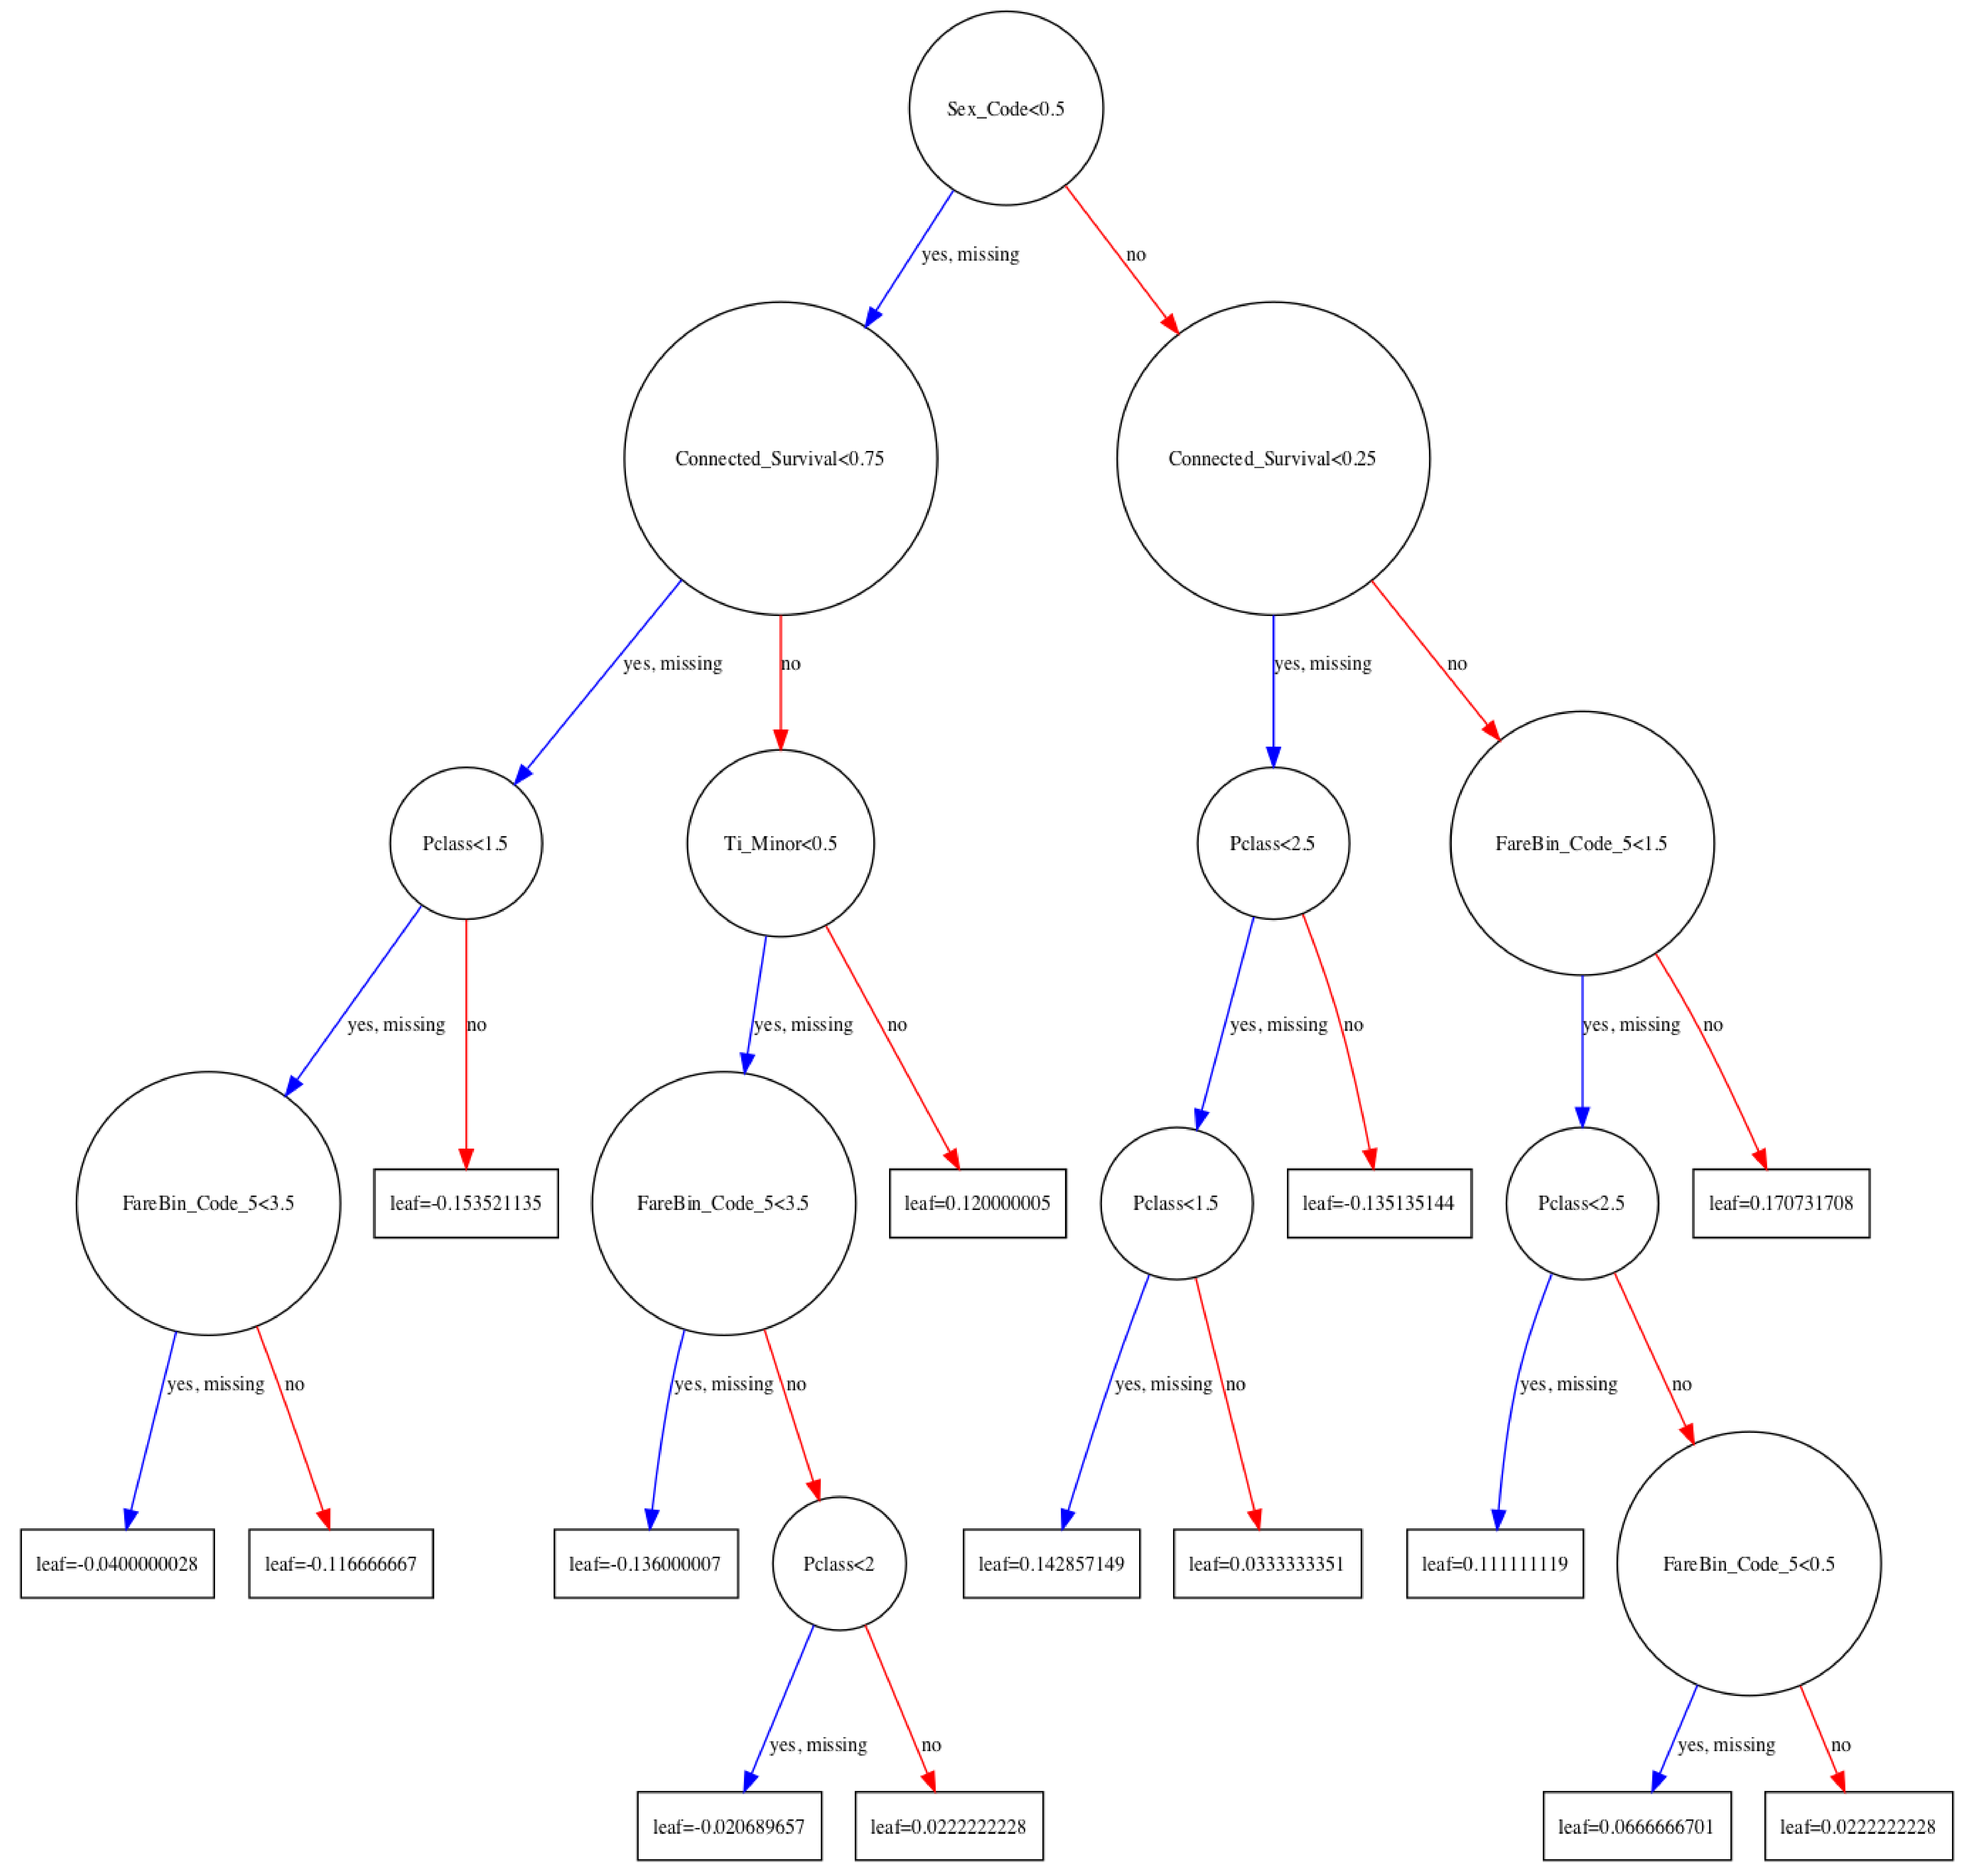

In [72]:
from graphviz import Digraph
from xgboost import plot_tree
import matplotlib.pyplot as plt

# 創建呈現在每一棵樹上的feature name
def create_feature_map(features):
    outfile = open("xgb.fmap", "w")
    i = 0
    for feat in features:
        outfile.write("{0}\t{1}\tq\t".format(i, feat))
        i = i+1
    outfile.close

create_feature_map(X_train.columns)
plot_tree(xgb, # 引入上面訓練好的xgb model 
          num_trees=0, # 第幾棵樹
          fmap="xgb.fmap") # 引入feature name

fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()

In [83]:
submit['Survived'] = xgb.predict(dataTest.loc[:,feature_selection])
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit_to_kaggle_xgboost.csv', index= False)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


kaggle: